# [Issue# 1897 Additional Visuals for PUC Analysis](https://github.com/cal-itp/data-analyses/issues/1897)

Received list of transit operators cohorts that may be exempt from efficiency reporting, per PUC 99314.11, .6 and .7. 
- create visuals based on grouping set by list
- recreate visuals based on previous notebook work

## [99314.6](https://leginfo.legislature.ca.gov/faces/codes_displaySection.xhtml?sectionNum=99314.6.&lawCode=PUC)
>`funds shall be allocated for operating or capital purpose` pursuant to Sections 99313 and 99314 to an operator `if the operator meets either of the following efficiency standards`:
>- (A) `The operator shall receive its entire allocation`, and any or all of this allocation may be used for operating purposes, if the operator’s `total operating cost per revenue vehicle hour` in the latest year for which audited data are available `does not exceed the sum of the preceding year’s total operating cost per revenue vehicle hour and an amount equal to the product of the percentage change in the Consumer Price Index for the same period multiplied by the preceding year’s total operating cost per revenue vehicle hour.`
>- (B) The operator shall receive its entire allocation, and any or all of this allocation may be used for operating purposes, `if the operator’s average total operating cost per revenue vehicle hour` in the latest three years for which audited data are available `does not exceed the sum of the average of the total operating cost per revenue vehicle hour in the three years preceding the latest year for which audited data are available and an amount equal to the product of the average percentage change in the Consumer Price Index for the same period multiplied by the average total operating cost per revenue vehicle hour in the same three years`.
## [99314.7 (mainly MTC specific)](https://leginfo.legislature.ca.gov/faces/codes_displaySection.xhtml?lawCode=PUC&sectionNum=99314.7.)
>the `Metropolitan Transportation Commission` shall apply the following eligibility standards to the operators within the region subject to its jurisdiction:

# [99314.11](https://leginfo.legislature.ca.gov/faces/codes_displaySection.xhtml?sectionNum=99314.11.&nodeTreePath=17.11.2.8&lawCode=PUC)
>`Sections 99314.6 and 99314.7 do not apply to an operator for a fiscal year in which the operator expended from local funding an amount for transit operations not less than the amount the operator expended from local funding for transit operations during the 2018–19 fiscal year.` As used in this subdivision, “local funding” means any nonstate grant funds or other revenues generated by, earned by, or distributed to, an operator.

Meaning, if a transit operator spent local funds >= the local funds spent during FY 2018-2019, they are exempt from meeting efficiency standards(?)

## Data Exploration

### Categorical variaables
- Underlying metric
  - Farebox Recovery Ratio
  - Local funding expended
- area type
  - urban
  - rural
- cohorts
  - A
  - B
  - C
- NTD metric
  - UPT
  - PMT
  - VRH
- year
  - 2019
  - 2020
  - 2021
  - 2022
  - 2023
  - 2024

## analyses should be split by underlying metric
resulting groups are:
1. Farebox Recovery ratio
    - urban
        - cohorts
        - ntd metric
        - year
    - rural
        - cohorts
        - ntd metrics
        - year
2. Local funding expended
    - urban
        - cohorts
        - ntd metric
        - year
    - rural
        - cohorts
        - ntd metrics
        - year

## 



In [1]:
import pandas as pd
import altair as alt
from functools import cache
from calitp_data_analysis.gcs_pandas import GCSPandas
from calitp_data_analysis.sql import get_engine, to_snakecase, query_sql

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

@cache
def gcs_pandas():
    return GCSPandas()

# Read in cohort list data

In [2]:
# cohort_data = gcs_pandas().read_csv("gs://calitp-analytics-data/data-analyses/ntd/fbr_local_funding_by_cohorts_2019-2024_compiled.csv")

# cohort_data.columns = cohort_data.columns.str.lower()
# cohort_data["ntd_id"] = cohort_data["ntd_id"].astype("str")

# display(
#     cohort_data.info(),
#     cohort_data.head(),
#     cohort_data.value_counts(
#     subset=["urban_rural","metric","cohort","year"]
#     )
# )

# Read in analysis data from prev notebook

In [3]:
gcs_path = "gs://calitp-analytics-data/data-analyses/ntd/"
# ntd_name = "puc_analysis_data.parquet"
# ntd_analysis_data = gcs_pandas().read_parquet(f"{gcs_path}{ntd_name}")

# display(
#     ntd_analysis_data.info(),
#     ntd_analysis_data["year"].unique()
# )

# May need to requery this data to include 2024
is 2024 NTD data in the warehouse now? copy pasted from initial puc analysis notebook.

In [4]:
# metric_list = [
#     "pmt",
#     "upt",
#     "vrh",
#     # "opexp_total" # not needed for this project
# ]

# # empty list for appending DFs
# df_list = []

# # loop to query pmt, upt and vrh from 2018 to 2024
# for metric in metric_list:
#         query = f"""
#         SELECT
#           ntd_id,
#           source_agency,
#           agency_status,
#           primary_uza_name,
#           uza_population,
#           uza_area_sq_miles,
#           year,
#           mode,
#           type_of_service,
#           reporter_type,
#           SUM({metric}) AS total_{metric},
#         FROM
#           `cal-itp-data-infra.mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_{metric}`
#         WHERE
#           source_state = "CA"
#           AND year BETWEEN 2018 AND 2024
#         GROUP BY
#           ntd_id,
#           source_agency,
#           agency_status,
#           primary_uza_name,
#           uza_population,
#           uza_area_sq_miles,
#           year,
#           mode,
#           type_of_service,
#           reporter_type
#         """
#         # create df
#         metric = query_sql(query, as_df=True)

#         # append df to list
#         df_list.append(metric)

# # unpack list into separate DFs
# ntd_pmt, ntd_upt, ntd_vrh = df_list

# display( 
#     ntd_upt.head(3)
# )

## merge all the metrics together

In [5]:
# merge_on_col = [
#     "ntd_id",
#     "year",
#     "source_agency",
#     "agency_status",
#     "primary_uza_name",
#     "uza_population",
#     "uza_area_sq_miles",
#     "mode",
#     "type_of_service",
#     "reporter_type",
# ]

# merge_1 = ntd_vrh.merge(ntd_upt, on=merge_on_col, how="inner")
# # merge_2 = merge_1.merge(ntd_vrh, on=merge_on_col, how = "inner")

# ntd_metrics_merge = merge_1.merge(ntd_pmt, on=merge_on_col, how="inner")

# ntd_metrics_merge.head(3)

## get districts for ntd ID
- Do i still need district data for this specific analysis?

In [6]:
# for metric in metric_list:
#         query = f"""
#         SELECT
#           `mart_transit_database.dim_organizations`.`key` AS `key`,
#           `mart_transit_database.dim_organizations`.`source_record_id` AS `source_record_id`,
#           `mart_transit_database.dim_organizations`.`name` AS `name`,
#           `mart_transit_database.dim_organizations`.`ntd_id_2022` AS `ntd_id_2022`,
#           `Bridge_Organizations_X_Headquarters_County_Geography___Key`.`county_geography_name` AS `county`,
#           `Dim_County_Geography___County_Geography_Key`.`caltrans_district` AS `caltrans_district`
#         FROM
#           `mart_transit_database.dim_organizations`

#         LEFT JOIN `mart_transit_database.bridge_organizations_x_headquarters_county_geography` AS `Bridge_Organizations_X_Headquarters_County_Geography___Key` ON `mart_transit_database.dim_organizations`.`key` = `Bridge_Organizations_X_Headquarters_County_Geography___Key`.`organization_key`
#           LEFT JOIN `mart_transit_database.dim_county_geography` AS `Dim_County_Geography___County_Geography_Key` ON `Bridge_Organizations_X_Headquarters_County_Geography___Key`.`county_geography_key` = `Dim_County_Geography___County_Geography_Key`.`key`
#         WHERE
#           (
#             `mart_transit_database.dim_organizations`.`_is_current` = TRUE
#           )

#            AND (
#             `mart_transit_database.dim_organizations`.`ntd_id_2022` IS NOT NULL
#           )
#           AND (
#             (
#               `mart_transit_database.dim_organizations`.`ntd_id_2022` <> ''
#             )

#             OR (
#               `mart_transit_database.dim_organizations`.`ntd_id_2022` IS NULL
#             )
#           )
#           AND (
#             `Bridge_Organizations_X_Headquarters_County_Geography___Key`.`_is_current` = TRUE
#           )
#           AND (
#             `Dim_County_Geography___County_Geography_Key`.`_is_current` = TRUE
#           )
#         """
#         # create df
#         ntd_id_x_district = query_sql(query, as_df=True)
        
# ntd_id_x_district["caltrans_district"] = ntd_id_x_district["caltrans_district"].astype("str")

# ntd_id_x_district.head()

## merge the ntd metrics with Caltrans Districts

In [7]:
# ntd_metrics_merge = ntd_metrics_merge.merge(
#     ntd_id_x_district[["ntd_id_2022","county","caltrans_district"]],
#     left_on = "ntd_id",
#     right_on = "ntd_id_2022",
#     how="inner",
#     indicator=True
# )

# ntd_metrics_merge.head()

# merge ntd metrics with cohort data
- merge on ntd_id
- are there any unmerged rows?

In [8]:
# ntd_cohort_merge = ntd_metrics_merge.drop(columns="_merge").merge(
#     cohort_data,
#     left_on = ["ntd_id","year"],
#     right_on = ["ntd_id","year"],
#     indicator= True,
# )

# # any unmerged rows? NONE
# ntd_cohort_merge["_merge"].value_counts()

In [9]:
# # Sanity check
# # pick up a couple of NTD ID, see if the merge data tracks with the cohort data
# sample_ids = ntd_cohort_merge["ntd_id"].sample(3).to_list()
# keep_cols=[
#     "ntd_id",
#     "source_agency",
#     "mode",
#     "type_of_service",
#     "total_vrh",
#     "total_pmt",
#     "total_upt",
#     "urban_rural",
#     "cohort",
#     "metric",
#     "year"
# ]

# for sample_id in sample_ids:
#     display(
#         f"Sameple NTD ID: {sample_id}",
#         "cohort data",
#         cohort_data[
#             (cohort_data["ntd_id"]== sample_id)
#             & (cohort_data["year"].isin([2023,2024]))
#             ].sort_values(by=["urban_rural","cohort","metric","year"]).head(5),
#         "merge table",
#         ntd_cohort_merge[
#             (ntd_cohort_merge["ntd_id"]== sample_id)
#             & (ntd_cohort_merge["year"].isin([2023,2024]))
#             ][keep_cols].sort_values(by=["urban_rural","cohort","metric","year"]),
        
#     )

# # cohort data matches, 
# # looks a little weird since the ntd metrics is per mode and TOS. the cohort data becomes categorical. GTG

# Save merged cohort data

In [10]:
cort_merge_filname = "ntd_cohort_data_2026-01-26.parquet"
# gcs_pandas().data_frame_to_parquet(ntd_cohort_merge,f"{gcs_path}{cort_merge_filname}")

# Read in merged cohort data from GCS

In [11]:
ntd_cohort_merge = gcs_pandas().read_parquet(f"{gcs_path}{cort_merge_filname}")

# separate list by both metrics (farebox and funding change)

In [12]:
cohort_merge_farebox = ntd_cohort_merge[ntd_cohort_merge["metric"]=="Farebox Recovery Ratio"]
cohort_merge_funding = ntd_cohort_merge[ntd_cohort_merge["metric"]=="Local Funding % Change vs 2019"]

In [13]:
display(
    cohort_merge_farebox.shape,
    cohort_merge_funding.shape,
    cohort_merge_farebox["metric"].unique(),
    cohort_merge_funding["metric"].unique(),
    cohort_merge_farebox.columns
)

(2460, 20)

(2505, 20)

array(['Farebox Recovery Ratio'], dtype=object)

array(['Local Funding % Change vs 2019'], dtype=object)

Index(['ntd_id', 'source_agency', 'agency_status', 'primary_uza_name',
       'uza_population', 'uza_area_sq_miles', 'year', 'mode',
       'type_of_service', 'reporter_type', 'total_vrh', 'total_upt',
       'total_pmt', 'ntd_id_2022', 'county', 'caltrans_district',
       'urban_rural', 'cohort', 'metric', '_merge'],
      dtype='object')

# Group aggregation

## melt big DF 
- so all columns are under 1 column.

In [14]:
group_list_melt = [
    "source_agency",
    "year",
    "ntd_id",
    "caltrans_district",
    "mode",
    "type_of_service",
    "urban_rural",
    "cohort",
    "metric"
]

value_cols = ["total_upt", "total_vrh", "total_pmt"]

melt_farebox = pd.melt(
    cohort_merge_farebox,
    id_vars=group_list_melt,
    value_vars=value_cols,
    var_name="ntd_metric",
    value_name="ntd_metric_value",
    ignore_index=True,
)

melt_funding = pd.melt(
    cohort_merge_funding,
    id_vars=group_list_melt,
    value_vars=value_cols,
    var_name="ntd_metric",
    value_name="ntd_metric_value",
    ignore_index=True,
)

In [15]:
display(
    melt_farebox.shape,
    melt_funding.shape
)

(7380, 11)

(7515, 11)

In [16]:
sample_ids = ntd_cohort_merge["ntd_id"].sample(3).to_list()
melt_farebox[melt_farebox["ntd_id"].isin([sample_ids[1]])].sort_values(by=["year","mode","type_of_service"])

,source_agency,year,ntd_id,caltrans_district,mode,type_of_service,urban_rural,cohort,metric,ntd_metric,ntd_metric_value
1184,Lassen Transit Service Agency (LTSA),2019,91098,2,CB,DO,Rural,Group A,Farebox Recovery Ratio,total_upt,NaN
3644,Lassen Transit Service Agency (LTSA),2019,91098,2,CB,DO,Rural,Group A,Farebox Recovery Ratio,total_vrh,NaN
6104,Lassen Transit Service Agency (LTSA),2019,91098,2,CB,DO,Rural,Group A,Farebox Recovery Ratio,total_pmt,NaN
1183,Lassen Transit Service Agency (LTSA),2019,91098,2,CB,PT,Rural,Group A,Farebox Recovery Ratio,total_upt,"21,420.00"
3643,Lassen Transit Service Agency (LTSA),2019,91098,2,CB,PT,Rural,Group A,Farebox Recovery Ratio,total_vrh,"4,227.00"
6103,Lassen Transit Service Agency (LTSA),2019,91098,2,CB,PT,Rural,Group A,Farebox Recovery Ratio,total_pmt,NaN
1180,Lassen Transit Service Agency (LTSA),2019,91098,2,DR,DO,Rural,Group A,Farebox Recovery Ratio,total_upt,NaN
3640,Lassen Transit Service Agency (LTSA),2019,91098,2,DR,DO,Rural,Group A,Farebox Recovery Ratio,total_vrh,NaN
6100,Lassen Transit Service Agency (LTSA),2019,91098,2,DR,DO,Rural,Group A,Farebox Recovery Ratio,total_pmt,NaN
1174,Lassen Transit Service Agency (LTSA),2019,91098,2,DR,PT,Rural,Group A,Farebox Recovery Ratio,total_upt,"21,791.00"


In [17]:
melt_funding[melt_funding["ntd_id"].isin([sample_ids[1]])].sort_values(by=["year","mode","type_of_service"])

,source_agency,year,ntd_id,caltrans_district,mode,type_of_service,urban_rural,cohort,metric,ntd_metric,ntd_metric_value
1225,Lassen Transit Service Agency (LTSA),2019,91098,2,CB,DO,Rural,Group A,Local Funding % Change vs 2019,total_upt,NaN
3730,Lassen Transit Service Agency (LTSA),2019,91098,2,CB,DO,Rural,Group A,Local Funding % Change vs 2019,total_vrh,NaN
6235,Lassen Transit Service Agency (LTSA),2019,91098,2,CB,DO,Rural,Group A,Local Funding % Change vs 2019,total_pmt,NaN
1224,Lassen Transit Service Agency (LTSA),2019,91098,2,CB,PT,Rural,Group A,Local Funding % Change vs 2019,total_upt,"21,420.00"
3729,Lassen Transit Service Agency (LTSA),2019,91098,2,CB,PT,Rural,Group A,Local Funding % Change vs 2019,total_vrh,"4,227.00"
6234,Lassen Transit Service Agency (LTSA),2019,91098,2,CB,PT,Rural,Group A,Local Funding % Change vs 2019,total_pmt,NaN
1221,Lassen Transit Service Agency (LTSA),2019,91098,2,DR,DO,Rural,Group A,Local Funding % Change vs 2019,total_upt,NaN
3726,Lassen Transit Service Agency (LTSA),2019,91098,2,DR,DO,Rural,Group A,Local Funding % Change vs 2019,total_vrh,NaN
6231,Lassen Transit Service Agency (LTSA),2019,91098,2,DR,DO,Rural,Group A,Local Funding % Change vs 2019,total_pmt,NaN
1215,Lassen Transit Service Agency (LTSA),2019,91098,2,DR,PT,Rural,Group A,Local Funding % Change vs 2019,total_upt,"21,791.00"


## aggregation group by
- farebox melt
    - PMT, UPT, VRH totals for urban, per year
    - PMT, UPT, VRH totals for rural, per year
    - PMT, UPT, VRH totals for cohort A, per year
    - PMT, UPT, VRH totals for cohort B, per year
    - PMT, UPT, VRH totals for cohort C, per year
- funding melt
    - PMT, UPT, VRH totals for urban, per year
    - PMT, UPT, VRH totals for rural, per year
    - PMT, UPT, VRH totals for cohort A, per year
    - PMT, UPT, VRH totals for cohort B, per year
    - PMT, UPT, VRH totals for cohort C, per year

In [18]:
group_list_agg = [
    "source_agency",
    "year",
    "ntd_id",
    "caltrans_district",
    
]
farebox_vrh_total = (
    melt_farebox[melt_farebox["ntd_metric"] == "total_vrh"]
    .groupby(group_list_agg)["ntd_metric_value"]
    .sum()
    .reset_index()
).rename(columns={"ntd_metric_value": "total_vrh"})

farebox_upt_total = (
    melt_farebox[melt_farebox["ntd_metric"] == "total_upt"]
    .groupby(group_list_agg)["ntd_metric_value"]
    .sum()
    .reset_index()
).rename(columns={"ntd_metric_value": "total_upt"})

farebox_pmt_total = (
    melt_farebox[melt_farebox["ntd_metric"] == "total_pmt"]
    .groupby(group_list_agg)["ntd_metric_value"]
    .sum()
    .reset_index()
).rename(columns={"ntd_metric_value": "total_pmt"})

farebox_cohort_totals = (
    cohort_merge_farebox.groupby(["year","cohort"])
    .agg({"total_upt": "sum", "total_vrh": "sum", "total_pmt": "sum"})
    .reset_index()
)

farebox_area_totals = (
    cohort_merge_farebox.groupby(["year","urban_rural"])
    .agg({"total_upt": "sum", "total_vrh": "sum", "total_pmt": "sum"})
    .reset_index()
)

In [19]:
funding_vrh_total = (
    melt_funding[melt_funding["ntd_metric"] == "total_vrh"]
    .groupby(group_list_agg)["ntd_metric_value"]
    .sum()
    .reset_index()
).rename(columns={"ntd_metric_value": "total_vrh"})

funding_upt_total = (
    melt_funding[melt_funding["ntd_metric"] == "total_upt"]
    .groupby(group_list_agg)["ntd_metric_value"]
    .sum()
    .reset_index()
).rename(columns={"ntd_metric_value": "total_upt"})

funding_pmt_total = (
    melt_funding[melt_funding["ntd_metric"] == "total_pmt"]
    .groupby(group_list_agg)["ntd_metric_value"]
    .sum()
    .reset_index()
).rename(columns={"ntd_metric_value": "total_pmt"})

funding_cohort_totals = (
    cohort_merge_funding.groupby(["year","cohort"])
    .agg({"total_upt": "sum", "total_vrh": "sum", "total_pmt": "sum"})
    .reset_index()
)

funding_area_totals = (
    cohort_merge_funding.groupby(["year","urban_rural"])
    .agg({"total_upt": "sum", "total_vrh": "sum", "total_pmt": "sum"})
    .reset_index()
)

## summary stats

In [20]:
melt_farebox.columns

Index(['source_agency', 'year', 'ntd_id', 'caltrans_district', 'mode',
       'type_of_service', 'urban_rural', 'cohort', 'metric', 'ntd_metric',
       'ntd_metric_value'],
      dtype='object')

In [34]:
metric_df ={ 
    "farebox_upt_total":farebox_upt_total, 
    "farebox_pmt_total":farebox_pmt_total, 
    "farebox_vrh_total":farebox_vrh_total, 
    "funding_upt_total":funding_upt_total, 
    "funding_pmt_total":funding_pmt_total, 
    "funding_vrh_total":funding_vrh_total,

}
metric_cols = [
    "total_upt",
    "total_pmt",
    "total_vrh"
]
cohorts = [
    "Group A",
    "Group B",
    "Group C"
]


# Raw Data tables

In [23]:
display(
    farebox_cohort_totals,
    funding_cohort_totals,
)

,year,cohort,total_upt,total_vrh,total_pmt
0,2019,Group A,"481,794,553.00","16,706,633.00","4,436,104,017.00"
1,2019,Group B,"912,340,315.00","28,495,217.00","3,939,125,127.00"
2,2019,Group C,"20,087,538.00","1,850,617.00","92,484,145.00"
3,2020,Group A,"352,277,028.00","13,668,740.00","3,282,966,486.00"
4,2020,Group B,"742,982,204.00","27,311,983.00","3,208,061,903.00"
5,2020,Group C,"29,816,757.00","2,235,922.00","103,931,595.00"
6,2021,Group A,"232,748,151.00","15,751,885.00","1,143,151,643.00"
7,2021,Group B,"305,515,511.00","18,526,592.00","1,521,517,535.00"
8,2021,Group C,"21,506,525.00","2,299,048.00","67,203,239.00"
9,2022,Group A,"339,112,596.00","17,344,827.00","1,940,673,002.00"


,year,cohort,total_upt,total_vrh,total_pmt
0,2019,Group A,"148,588,010.00","8,696,556.00","1,008,222,676.00"
1,2019,Group B,"1,013,268,987.00","27,355,817.00","6,193,402,337.00"
2,2019,Group C,"78,329,932.00","5,536,365.00","422,818,499.00"
3,2020,Group A,"99,043,391.00","6,192,452.00","546,200,398.00"
4,2020,Group B,"454,096,208.00","19,486,133.00","2,408,906,495.00"
5,2020,Group C,"429,594,138.00","12,507,084.00","2,925,227,657.00"
6,2021,Group A,"77,094,314.00","7,204,425.00","493,327,080.00"
7,2021,Group B,"295,977,041.00","18,366,058.00","1,349,474,466.00"
8,2021,Group C,"109,997,160.00","6,162,919.00","466,817,866.00"
9,2022,Group A,"74,711,924.00","6,127,962.00","418,870,194.00"


In [24]:
display(
    farebox_area_totals,
    funding_area_totals
)

,year,urban_rural,total_upt,total_vrh,total_pmt
0,2019,Rural,"5,928,494.00","834,029.00",0.00
1,2019,Urban,"1,408,293,912.00","46,218,438.00","8,467,713,289.00"
2,2020,Rural,"4,798,067.00","770,218.00",0.00
3,2020,Urban,"1,120,277,922.00","42,446,427.00","6,594,959,984.00"
4,2021,Rural,"2,326,733.00","646,031.00",0.00
5,2021,Urban,"557,443,454.00","35,931,494.00","2,731,872,417.00"
6,2022,Rural,"3,535,335.00","678,449.00",0.00
7,2022,Urban,"800,388,439.00","40,185,140.00","4,104,801,024.00"
8,2023,Rural,"4,226,671.00","712,702.00",0.00
9,2023,Urban,"948,815,353.00","42,058,866.00","4,962,163,814.00"


,year,urban_rural,total_upt,total_vrh,total_pmt
0,2019,Rural,"5,903,838.00","827,864.00",0.00
1,2019,Urban,"1,234,283,091.00","40,760,874.00","7,624,443,512.00"
2,2020,Rural,"4,824,834.00","776,637.00",0.00
3,2020,Urban,"977,908,903.00","37,409,032.00","5,880,334,550.00"
4,2021,Rural,"2,370,192.00","662,767.00",0.00
5,2021,Urban,"480,698,323.00","31,070,635.00","2,309,619,412.00"
6,2022,Rural,"3,700,019.00","723,578.00",0.00
7,2022,Urban,"683,949,382.00","34,664,550.00","3,442,444,852.00"
8,2023,Rural,"4,374,666.00","747,190.00",0.00
9,2023,Urban,"809,475,174.00","36,582,016.00","4,178,216,536.00"


# Whats going on in 2022 for Group C?
- why do we see a jump in metrics data in 2022 for Group C?

In [25]:
# who are the big contributors in group c?

In [35]:
melt_farebox.plot()

<Axes: >

In [26]:
# how many unique NTD IDs in group c appear per year?

In [38]:
melt_farebox.groupby(["cohort","year",]).agg({"ntd_id":"nunique"})

ntd_id
cohort  year        
Group A 2019      38
        2020      37
        2021      34
        2022      35
        2023      34
        2024      33
Group B 2019      73
        2020      73
        2021      70
        2022      70
        2023      72
        2024      71
Group C 2019      39
        2020      39
        2021      37
        2022      36
        2023      37
        2024      37

In [39]:
melt_funding.groupby(["cohort","year",]).agg({"ntd_id":"nunique"})

ntd_id
cohort  year        
Group A 2019      36
        2020      39
        2021      39
        2022      39
        2023      39
        2024      38
Group B 2019      72
        2020      74
        2021      73
        2022      74
        2023      74
        2024      75
Group C 2019      38
        2020      38
        2021      39
        2022      38
        2023      38
        2024      38

In [29]:
melt_farebox.groupby("year").agg({
    "ntd_id":"nunique",
})

,ntd_id
year,
2019,149
2020,148
2021,141
2022,140
2023,142
2024,140


<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

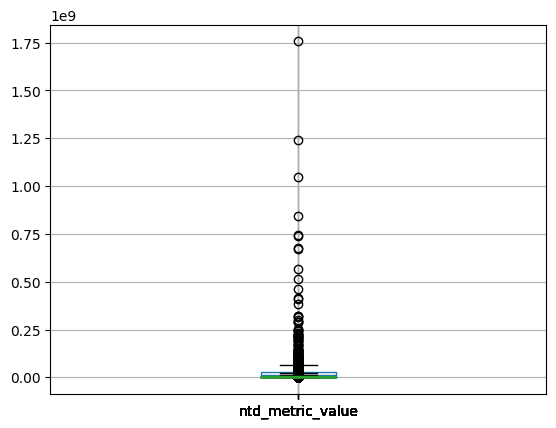

In [30]:
#
for metric in metric_cols:
    for cohort in cohorts:
        display(melt_farebox[
            (melt_farebox["ntd_metric"]==metric)
            & (melt_farebox["cohort"]==cohort)
            ].boxplot(column="ntd_metric_value"))

In [31]:
melt_farebox[
            (melt_farebox["ntd_metric"]=="total_upt")
            & (melt_farebox["cohort"]=="Group C")
            ].boxplot(column="ntd_metric_value")

<Axes: >

In [32]:
melt_farebox.boxplot(column=["ntd_metric_value"], by="cohort")

<Axes: title={'center': 'ntd_metric_value'}, xlabel='cohort'>

In [33]:
melt_farebox[melt_farebox["ntd_metric"]=="total_upt"]

,source_agency,year,ntd_id,caltrans_district,mode,type_of_service,urban_rural,cohort,metric,ntd_metric,ntd_metric_value
0,San Francisco Bay Area Rapid Transit District ...,2019,90003,4,MG,PT,Urban,Group A,Farebox Recovery Ratio,total_upt,"886,515.00"
1,San Francisco Bay Area Rapid Transit District ...,2019,90003,4,MB,PT,Urban,Group A,Farebox Recovery Ratio,total_upt,NaN
2,San Francisco Bay Area Rapid Transit District ...,2021,90003,4,MG,PT,Urban,Group B,Farebox Recovery Ratio,total_upt,"112,981.00"
3,San Francisco Bay Area Rapid Transit District ...,2021,90003,4,DR,PT,Urban,Group B,Farebox Recovery Ratio,total_upt,NaN
4,San Francisco Bay Area Rapid Transit District ...,2019,90003,4,YR,DO,Urban,Group A,Farebox Recovery Ratio,total_upt,"2,225,056.00"
5,San Francisco Bay Area Rapid Transit District ...,2021,90003,4,YR,DO,Urban,Group B,Farebox Recovery Ratio,total_upt,"601,424.00"
6,San Francisco Bay Area Rapid Transit District ...,2020,90003,4,HR,DO,Urban,Group A,Farebox Recovery Ratio,total_upt,"88,698,878.00"
7,San Francisco Bay Area Rapid Transit District ...,2021,90003,4,MB,PT,Urban,Group B,Farebox Recovery Ratio,total_upt,NaN
8,San Francisco Bay Area Rapid Transit District ...,2019,90003,4,DR,PT,Urban,Group A,Farebox Recovery Ratio,total_upt,NaN
9,San Francisco Bay Area Rapid Transit District ...,2020,90003,4,MB,PT,Urban,Group A,Farebox Recovery Ratio,total_upt,NaN
